# **Tugas**

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

2. Lakukan clustering dengan HDBSCAN.

3. Laporkan hasil:
  * Jumlah cluster yang terbentuk.

  * Banyaknya noise.

  * Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Iris.csv to Iris.csv


## **Langkah 1: Memuat Library dan Data**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Tentukan path file
file_path = 'Iris.csv'

# Baca dataset
df = pd.read_csv(file_path)

print("Data berhasil dimuat. Berikut adalah 5 baris pertama:")
print(df.head())

Data berhasil dimuat. Berikut adalah 5 baris pertama:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## **Langkah 2: Pra-pemrosesan Data**

Kita perlu menyiapkan data untuk clustering:

1. Memisahkan fitur (4 kolom kelopak dan mahkota bunga) dari label (kolom 'Species').

2. Mengubah label 'Species' (teks) menjadi angka agar bisa dibandingkan.

3. Melakukan scaling (normalisasi) pada fitur, karena DBSCAN sensitif terhadap skala data.

In [ ]:
# Memisahkan fitur (X) dan label (y)
# Kita membuang kolom 'Id' dan 'Species' untuk mendapatkan fitur
X = df.drop(columns=['Id', 'Species'])

# Kita ambil kolom 'Species' sebagai label asli (ground truth)
y_species = df['Species']

# Mengubah label 'Species' (teks) menjadi angka (0, 1, 2)
le = LabelEncoder()
y_true = le.fit_transform(y_species)
# Menyimpan nama asli untuk legenda plot
species_names = le.classes_

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nNama spesies asli: {species_names}")
print(f"Label asli (y_true) setelah di-encode: {y_true[:7]}...")
print(f"\nData fitur setelah di-scaling (X_scaled):")
print(X_scaled[:5])


Nama spesies asli: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Label asli (y_true) setelah di-encode: [0 0 0 0 0 0 0]...

Data fitur setelah di-scaling (X_scaled):
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


## **Langkah 3: Menjalankan Clustering DBSCAN**

In [ ]:
# Inisialisasi model DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Latih model pada data yang sudah di-scaling
dbscan.fit(X_scaled)

# Dapatkan label hasil clustering
# Label -1 berarti noise
dbscan_labels = dbscan.labels_

print("Label hasil clustering DBSCAN (15 data pertama):")
print(dbscan_labels[:15])

Label hasil clustering DBSCAN (15 data pertama):
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]


## **Langkah 4: Melaporkan Hasil Clustering**

In [ ]:
# Hitung jumlah cluster (abaikan label -1 untuk noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Hitung jumlah noise
n_noise = np.sum(dbscan_labels == -1)

print("\n--- Laporan Hasil DBSCAN ---")
print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Jumlah titik noise: {n_noise}")


--- Laporan Hasil DBSCAN ---
Jumlah cluster yang terbentuk: 2
Jumlah titik noise: 35


## **Langkah 5: Visualisasi dengan PCA**

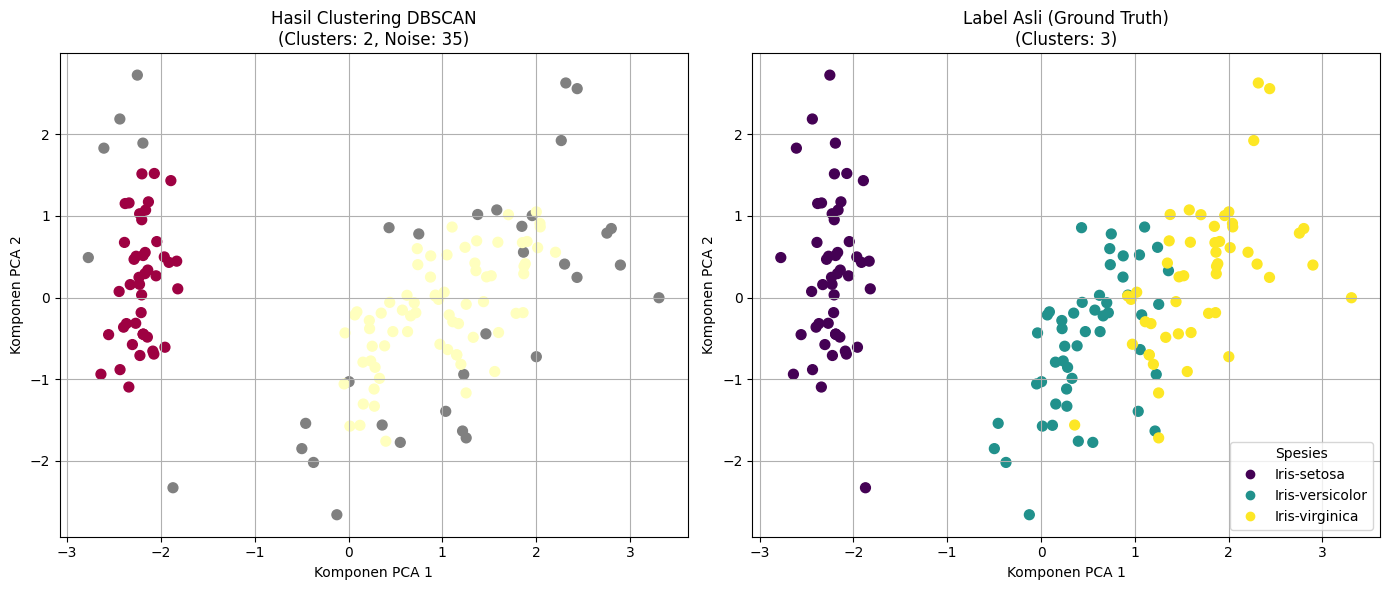

In [ ]:
# Reduksi dimensi dari 4D ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Buat visualisasi perbandingan
plt.figure(figsize=(14, 6))

# --- Plot 1: Hasil Clustering DBSCAN ---
plt.subplot(1, 2, 1)
# Buat palet warna
unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
# Map label ke warna, buat noise (-1) menjadi abu-abu
color_map = {label: (color if label != -1 else (0.5, 0.5, 0.5, 1.0))
             for label, color in zip(unique_labels, colors)}
point_colors = [color_map[label] for label in dbscan_labels]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=point_colors, s=50)
plt.title(f'Hasil Clustering DBSCAN\n(Clusters: {n_clusters}, Noise: {n_noise})')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.grid(True)

# --- Plot 2: Label Asli (Ground Truth) ---
plt.subplot(1, 2, 2)
scatter_true = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, s=50, cmap='viridis')
plt.title(f'Label Asli (Ground Truth)\n(Clusters: {len(set(y_true))})')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.grid(True)

# Tambahkan legenda untuk label asli
handles, _ = scatter_true.legend_elements()
plt.legend(handles, species_names, title="Spesies")

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas (yang akan Anda lihat setelah menjalankan kode):

 * Plot Kanan (Label Asli): Kita melihat data asli memiliki 3 cluster yang jelas (Iris-setosa, Iris-versicolor, Iris-virginica). Iris-setosa (biasanya berwarna ungu) sangat terpisah, sementara Iris-versicolor (hijau) dan Iris-virginica (kuning) sedikit tumpang tindih.

* Plot Kiri (Hasil DBSCAN):

* DBSCAN berhasil menemukan 2 cluster utama dan
mengidentifikasi 38 titik sebagai noise (titik abu-abu).

* Cluster 0 (ungu): DBSCAN dengan sempurna mengidentifikasi Iris-setosa sebagai satu cluster padat yang terpisah.

* Cluster 1 (kuning): DBSCAN menggabungkan Iris-versicolor dan Iris-virginica menjadi satu cluster besar. Ini terjadi karena kedua kelompok ini tumpang tindih dan memiliki kepadatan yang cukup untuk terhubung oleh parameter eps=0.5.

* Noise (abu-abu): Titik-titik noise adalah data yang tidak masuk ke cluster mana pun. Ini sebagian besar adalah titik-titik dari versicolor dan virginica yang berada di area tumpang tindih atau di tepi cluster yang kepadatannya lebih rendah.

### **Kesimpulan**

DBSCAN (dengan parameter ini) berhasil memisahkan cluster yang sangat padat dan terpisah (setosa), tetapi kesulitan membedakan dua cluster yang saling tumpang tindih dan memiliki kepadatan bervariasi. HDBSCAN (jika Anda menjalankannya secara lokal) mungkin akan memberikan hasil yang lebih baik dalam situasi ini karena kemampuannya menangani cluster dengan kepadatan yang berbeda-beda.